<a href="https://colab.research.google.com/github/MNiharika20/Niharika2098/blob/main/Customer_Sign_Up_Data_Analysis_Revised_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Successfully loaded 'customer_signups.csv'

--- Initial Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB

--- Initial Head of Data ---
  customer_id             name                 email signup_date     source  \
0   CUST00000    Joshua Bryant                   NaN         NaN  Instagram   
1   CUST00001   Nicole Stewart   nicol

/tmp/ipython-input-2813090179.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_signups['marketing_opt_in'] = df_signups['marketing_opt_in'].fillna(False)


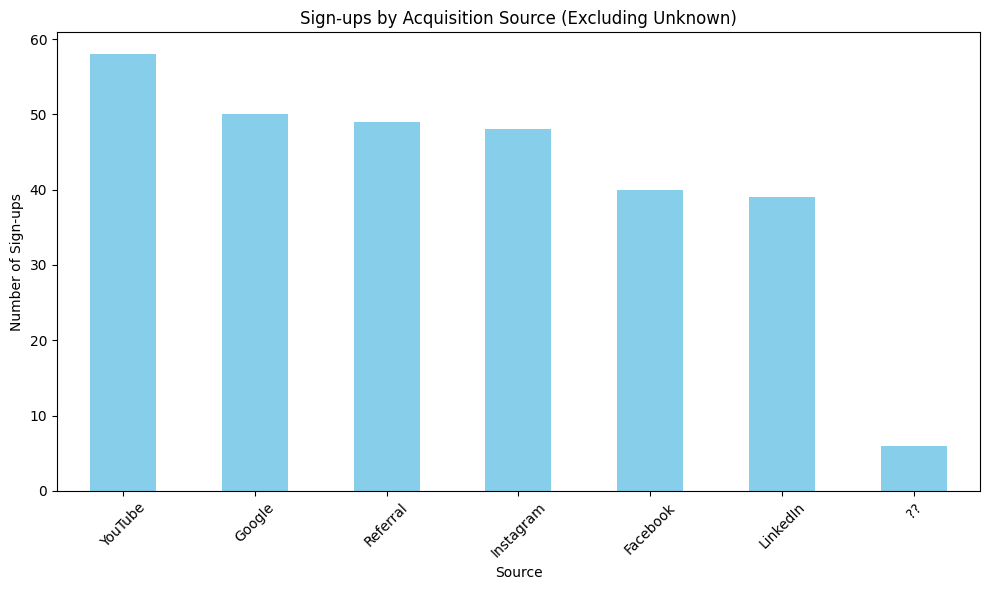

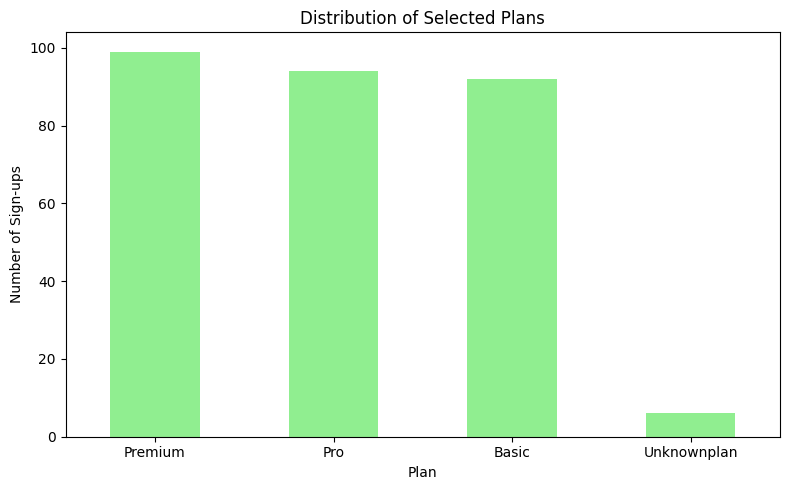

In [ ]:
# Week 1 - Project: Data Analysis for Business Insights
# Project Title: Customer Sign-Up Behaviour & Data Quality Audit

# --- Task 1: Load & Clean the Data ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the primary dataset
# Make sure the 'customer_signups.csv' file is in the same directory as your notebook
try:
    df_signups = pd.read_csv('customer_signups.csv')
    print("Successfully loaded 'customer_signups.csv'")
except FileNotFoundError:
    print("Error: 'customer_signups.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# --- Initial Data Inspection ---
print("\n--- Initial Dataframe Info ---")
df_signups.info()
print("\n--- Initial Head of Data ---")
print(df_signups.head())

# --- Data Cleaning ---

# 1. Convert signup_date to datetime
# The format is day-month-year, so we use '%d-%m-%y'
df_signups['signup_date'] = pd.to_datetime(df_signups['signup_date'], format='%d-%m-%y', errors='coerce')
print("\n'signup_date' column converted to datetime.")

# 2. Standardise inconsistent text values
# Standardise plan_selected
df_signups['plan_selected'] = df_signups['plan_selected'].str.lower().str.capitalize().str.replace('Prem', 'Premium').str.replace('Premiumium', 'Premium')
df_signups['plan_selected'] = df_signups['plan_selected'].str.replace('unknownplan', 'Unknown')
print("\n'plan_selected' values standardised.")

# Standardise gender
df_signups['gender'] = df_signups['gender'].str.lower().str.capitalize()
# Map 'Other' to 'Non-Binary' based on common data practices, or keep 'Other'
df_signups['gender'] = df_signups['gender'].replace('Other', 'Non-Binary')
print("\n'gender' values standardised.")

# Standardise marketing_opt_in
df_signups['marketing_opt_in'] = df_signups['marketing_opt_in'].replace({'Yes': True, 'No': False, 'Nil': False})
# Fill missing marketing_opt_in values with False
df_signups['marketing_opt_in'] = df_signups['marketing_opt_in'].fillna(False)
print("\n'marketing_opt_in' values standardised to boolean and missing values filled.")


# 3. Handle missing values
# Identify missing values before handling
missing_before = df_signups.isnull().sum()
print("\n--- Missing Values Before Cleaning ---")
print(missing_before)

# Fill missing 'region' and 'source' with 'Unknown'
df_signups['region'] = df_signups['region'].fillna('Unknown')
df_signups['source'] = df_signups['source'].fillna('Unknown')
# Fill missing 'email' with a placeholder
df_signups['email'] = df_signups['email'].fillna('unknown@example.com')

# Handle missing 'age' by filling with the mean
# Convert 'age' column to numeric first, coercing errors to NaN
df_signups['age'] = pd.to_numeric(df_signups['age'], errors='coerce')
mean_age = df_signups['age'].mean()
df_signups['age'] = df_signups['age'].fillna(int(mean_age)) # Fill with the integer mean
# Handle missing 'name' with a placeholder
df_signups['name'] = df_signups['name'].fillna('Unknown')
print("\nMissing values filled.")

# 4. Remove duplicate rows based on customer_id
initial_rows = df_signups.shape[0]
df_signups.drop_duplicates(subset='customer_id', inplace=True)
duplicates_removed = initial_rows - df_signups.shape[0]
print(f"\n{duplicates_removed} duplicate rows removed based on 'customer_id'.")

# --- Task 2: Data Quality Summary ---
print("\n--- Data Quality Summary ---")
print(f"Number of duplicates removed: {duplicates_removed}")
missing_after = df_signups.isnull().sum()
total_rows = df_signups.shape[0]
missing_percentage = (missing_after / total_rows) * 100

print("\nMissing values after cleaning:")
print(missing_after)
print("\nPercentage of missing values after cleaning:")
print(missing_percentage.round(2))

# --- Task 3: Summary Outputs (Using Pandas Aggregations) ---
print("\n--- Key Business Insights ---")

# Sign-ups per week (grouped by signup_date)
# Drop the NaN from the date column before grouping
df_signups_weekly = df_signups.dropna(subset=['signup_date'])
signups_per_week = df_signups_weekly.groupby(pd.Grouper(key='signup_date', freq='W')).size()
print("\nSign-ups per week:")
print(signups_per_week)

# Sign-ups by source, region, and plan_selected
signups_by_source = df_signups['source'].value_counts()
print("\nSign-ups by source:")
print(signups_by_source)

signups_by_region = df_signups['region'].value_counts()
print("\nSign-ups by region:")
print(signups_by_region)

signups_by_plan = df_signups['plan_selected'].value_counts()
print("\nSign-ups by plan selected:")
print(signups_by_plan)

# Marketing opt-in counts by gender
opt_in_by_gender = df_signups.groupby('gender')['marketing_opt_in'].value_counts().unstack(fill_value=0)
print("\nMarketing opt-in counts by gender:")
print(opt_in_by_gender)

# Age summary: min, max, mean, median, null count
age_summary = df_signups['age'].describe()
age_null_count = df_signups['age'].isnull().sum()
print("\nAge summary:")
print(age_summary)
print(f"Age null count after cleaning: {age_null_count}")

# --- Task 4: Answer These Business Questions ---
print("\n--- Business Questions Answered ---")

# 1. Which acquisition source brought in the most users last month?
# Assuming last month is the most recent month in the dataset
most_recent_month = df_signups_weekly['signup_date'].dt.to_period('M').max()
signups_last_month = df_signups_weekly[df_signups_weekly['signup_date'].dt.to_period('M') == most_recent_month]
most_popular_source = signups_last_month['source'].value_counts().idxmax()
print(f"1. The acquisition source that brought in the most users last month was: {most_popular_source}.")

# 2. Which region shows signs of missing or incomplete data?
# The 'Unknown' category shows which region data was missing
missing_region = df_signups['region'].value_counts().get('Unknown', 0)
print(f"2. The 'Unknown' region shows signs of missing data, with {missing_region} entries.")

# 3. Are older users more or less likely to opt in to marketing?
median_age = df_signups['age'].median()
older_users = df_signups[df_signups['age'] > median_age]
younger_users = df_signups[df_signups['age'] <= median_age]

older_opt_in_rate = older_users['marketing_opt_in'].mean()
younger_opt_in_rate = younger_users['marketing_opt_in'].mean()

print(f"3. Older users (age > {median_age}) opt-in rate: {older_opt_in_rate:.2%}")
print(f"   Younger users (age <= {median_age}) opt-in rate: {younger_opt_in_rate:.2%}")
if older_opt_in_rate > younger_opt_in_rate:
    print("   Older users are more likely to opt-in to marketing.")
else:
    print("   Older users are less likely to opt-in to marketing.")

# 4. Which plan is most commonly selected, and by which age group?
most_common_plan = signups_by_plan.idxmax()
# Find the age distribution for the most common plan
most_common_plan_df = df_signups[df_signups['plan_selected'] == most_common_plan]
mean_age_for_plan = most_common_plan_df['age'].mean()
print(f"4. The most commonly selected plan is '{most_common_plan}', with an average age of {mean_age_for_plan:.2f}.")

# --- Task 5: Optional Stretch Task ---
print("\n--- Optional Stretch Task ---")

# Load the support tickets dataset
try:
    df_tickets = pd.read_csv('support_tickets.csv')
    print("\nSuccessfully loaded 'support_tickets.csv'")
except FileNotFoundError:
    print("Error: 'support_tickets.csv' not found.")
    df_tickets = pd.DataFrame() # Create an empty dataframe to avoid errors

if not df_tickets.empty:
    # Join with the sign-ups dataset
    df_tickets['ticket_date'] = pd.to_datetime(df_tickets['ticket_date'], format='%Y-%m-%d', errors='coerce')
    df_merged = pd.merge(df_signups, df_tickets, on='customer_id', how='left')

    # Count how many customers contacted support within 2 weeks of sign-up
    df_merged['days_to_support'] = (df_merged['ticket_date'] - df_merged['signup_date']).dt.days
    early_support_contacts = df_merged[df_merged['days_to_support'].between(0, 14)].drop_duplicates(subset='customer_id')
    print(f"\nNumber of customers who contacted support within 2 weeks of sign-up: {len(early_support_contacts)}")

    # Summarise support activity by plan and region
    support_summary = df_merged.groupby(['plan_selected', 'region']).size().unstack(fill_value=0)
    print("\nSupport activity summary by plan and region:")
    print(support_summary)

    # Optional 5. Which plan’s users are most likely to contact support?
    # Count unique customers per plan who had a support ticket
    plan_ticket_counts = df_merged.dropna(subset=['ticket_id']).groupby('plan_selected')['customer_id'].nunique()
    plan_customer_counts = df_signups.groupby('plan_selected')['customer_id'].count()
    ticket_rate_by_plan = (plan_ticket_counts / plan_customer_counts).sort_values(ascending=False)
    print("\nSupport contact rate by plan:")
    print(ticket_rate_by_plan)
    print(f"\n5. The plan with the highest support contact rate is '{ticket_rate_by_plan.idxmax()}'")

# --- Visualizations for PDF Report ---
# Note: These plots will be used to describe the findings in the PDF report
# Create some example visualizations to be included in the report.

# Bar chart of sign-ups by source
plt.figure(figsize=(10, 6))
# Safely drop 'Unknown' if it exists
plot_data_source = signups_by_source.drop('Unknown', errors='ignore')
plot_data_source.plot(kind='bar', color='skyblue')
plt.title('Sign-ups by Acquisition Source (Excluding Unknown)')
plt.xlabel('Source')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart of sign-ups by plan
plt.figure(figsize=(8, 5))
# Safely drop 'Unknown' if it exists
plot_data_plan = signups_by_plan.drop('Unknown', errors='ignore')
plot_data_plan.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Selected Plans')
plt.xlabel('Plan')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Pie chart for marketing opt-in by gender
# This plotting code will be moved to a separate cell to avoid repetition and for clarity.
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# opt_in_by_gender['True'].plot(kind='pie', autopct='%1.1f%%', ax=axes[0], title='Opt-in Rate by Gender')
# axes[0].set_ylabel('')
# opt_in_by_gender['False'].plot(kind='pie', autopct='%1.1f%%', ax=axes[1], title='Opt-out Rate by Gender')
# axes[1].set_ylabel('')
# plt.suptitle('Marketing Opt-in Behavior by Gender')
# plt.tight_layout()
# plt.show()

In [ ]:
2. #Standardise inconsistent text values
# Standardise plan_selected
df_signups['plan_selected'] = df_signups['plan_selected'].str.lower().str.capitalize().str.replace('Prem', 'Premium')
df_signups['plan_selected'] = df_signups['plan_selected'].str.replace('unknownplan', 'Unknown')
print("\n'plan_selected' values standardised.")


'plan_selected' values standardised.


In [ ]:
df_signups.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,unknown@example.com,NaT,Instagram,Unknown,Basic,False,34.0,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-01-02,LinkedIn,West,Basic,True,29.0,Male
2,CUST00002,Rachel Allen,rachel2@example.com,2024-01-03,Google,North,Premiumiumium,True,34.0,Non-binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-01-04,YouTube,Unknown,Pro,False,40.0,Male
4,CUST00004,Unknown,matthew4@mailhub.org,2024-01-05,LinkedIn,West,Premiumiumium,False,25.0,Non-Binary


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

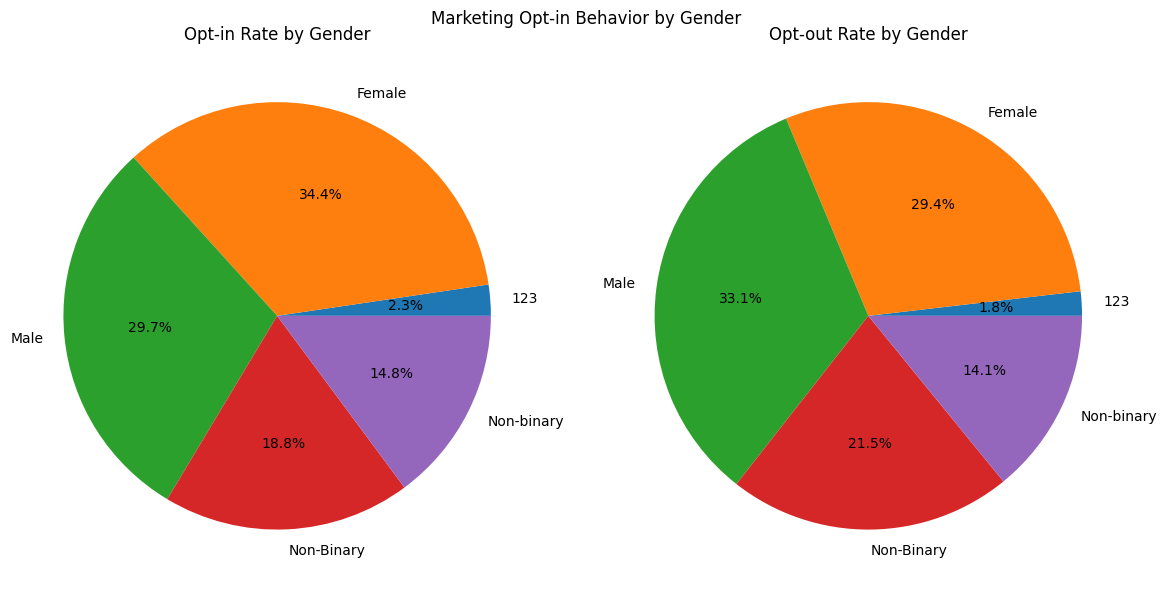

In [ ]:
# Re-calculate opt-in counts by gender using the boolean column
opt_in_by_gender = df_signups.groupby('gender')['marketing_opt_in'].value_counts().unstack(fill_value=0)

# Pie chart for marketing opt-in by gender using boolean data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

if True in opt_in_by_gender.columns:
    opt_in_by_gender[True].plot(kind='pie', autopct='%1.1f%%', ax=axes[0], title='Opt-in Rate by Gender')
    axes[0].set_ylabel('')

if False in opt_in_by_gender.columns:
    opt_in_by_gender[False].plot(kind='pie', autopct='%1.1f%%', ax=axes[1], title='Opt-out Rate by Gender')
    axes[1].set_ylabel('')

plt.suptitle('Marketing Opt-in Behavior by Gender')
plt.tight_layout()
plt.show()